In [1]:
from tqdm import tqdm
from pathlib import Path

import os
import sys
import matplotlib.pyplot as plt

path = Path.cwd()
while not (path / "computer_vision").exists():
    path = path.parent

sys.path.append(str(path))

datasets_path = "/home/otokonokage/Documents/github/dataset/computer_vision/"

# **Tiny-Imagenet200**
The dataset contains 200 classes divided uniformly by class.

# **CIFAR-10**

In [ ]:
from computer_vision.dataset import prepare_cifar10

train, validation, weights, num_classes, categories, dataset_name, dataset_type = prepare_cifar10(datasets_path, delete=False)

100%|██████████| 8/8 [00:00<00:00, 23.33it/s]


# **PASCALVOC2007**

In [ ]:
from computer_vision.dataset import prepare_vocdetection

train, validation, weights, num_classes, categories, dataset_name, dataset_type = prepare_vocdetection(datasets_path, "2007", box_format="xywh")

In [4]:
cmap = plt.get_cmap('tab20')

colors = [cmap(i / num_classes) for i in range(num_classes)]

In [5]:
from yolo_tools import intersection_over_union

import torch
elements_per_class_trainset = [0] * num_classes
bboxes_overlay_trainset = []

for (_, bboxes), (_, labels) in tqdm(zip(train["bboxes"].items(), train["labels"].items()), total=len(train["bboxes"]), leave=True):
    for label in labels:
        elements_per_class_trainset[label] += 1

    if len(bboxes) > 1:
        for i in range(len(bboxes) - 1):
            for j in range(i+1, len(bboxes) - 1):
                bboxes_overlay_trainset.append(intersection_over_union(torch.tensor(bboxes[i]), torch.tensor(bboxes[j]), box_format="xywh").item())

elements_per_class_validationset = [0] * num_classes
bboxes_overlay_validationset = []

for (_, bboxes), (_, labels) in tqdm(zip(validation["bboxes"].items(), validation["labels"].items()), total=len(validation["bboxes"]), leave=True):
    for label in labels:
        elements_per_class_validationset[label] += 1

    if len(bboxes) > 1:
        for i in range(len(bboxes) - 1):
            for j in range(i+1, len(bboxes) - 1):
                bboxes_overlay_validationset.append(intersection_over_union(torch.tensor(bboxes[i]), torch.tensor(bboxes[j]), box_format="xywh"))

100%|██████████| 2510/2510 [00:01<00:00, 2095.68it/s]


**Classes Distribution**

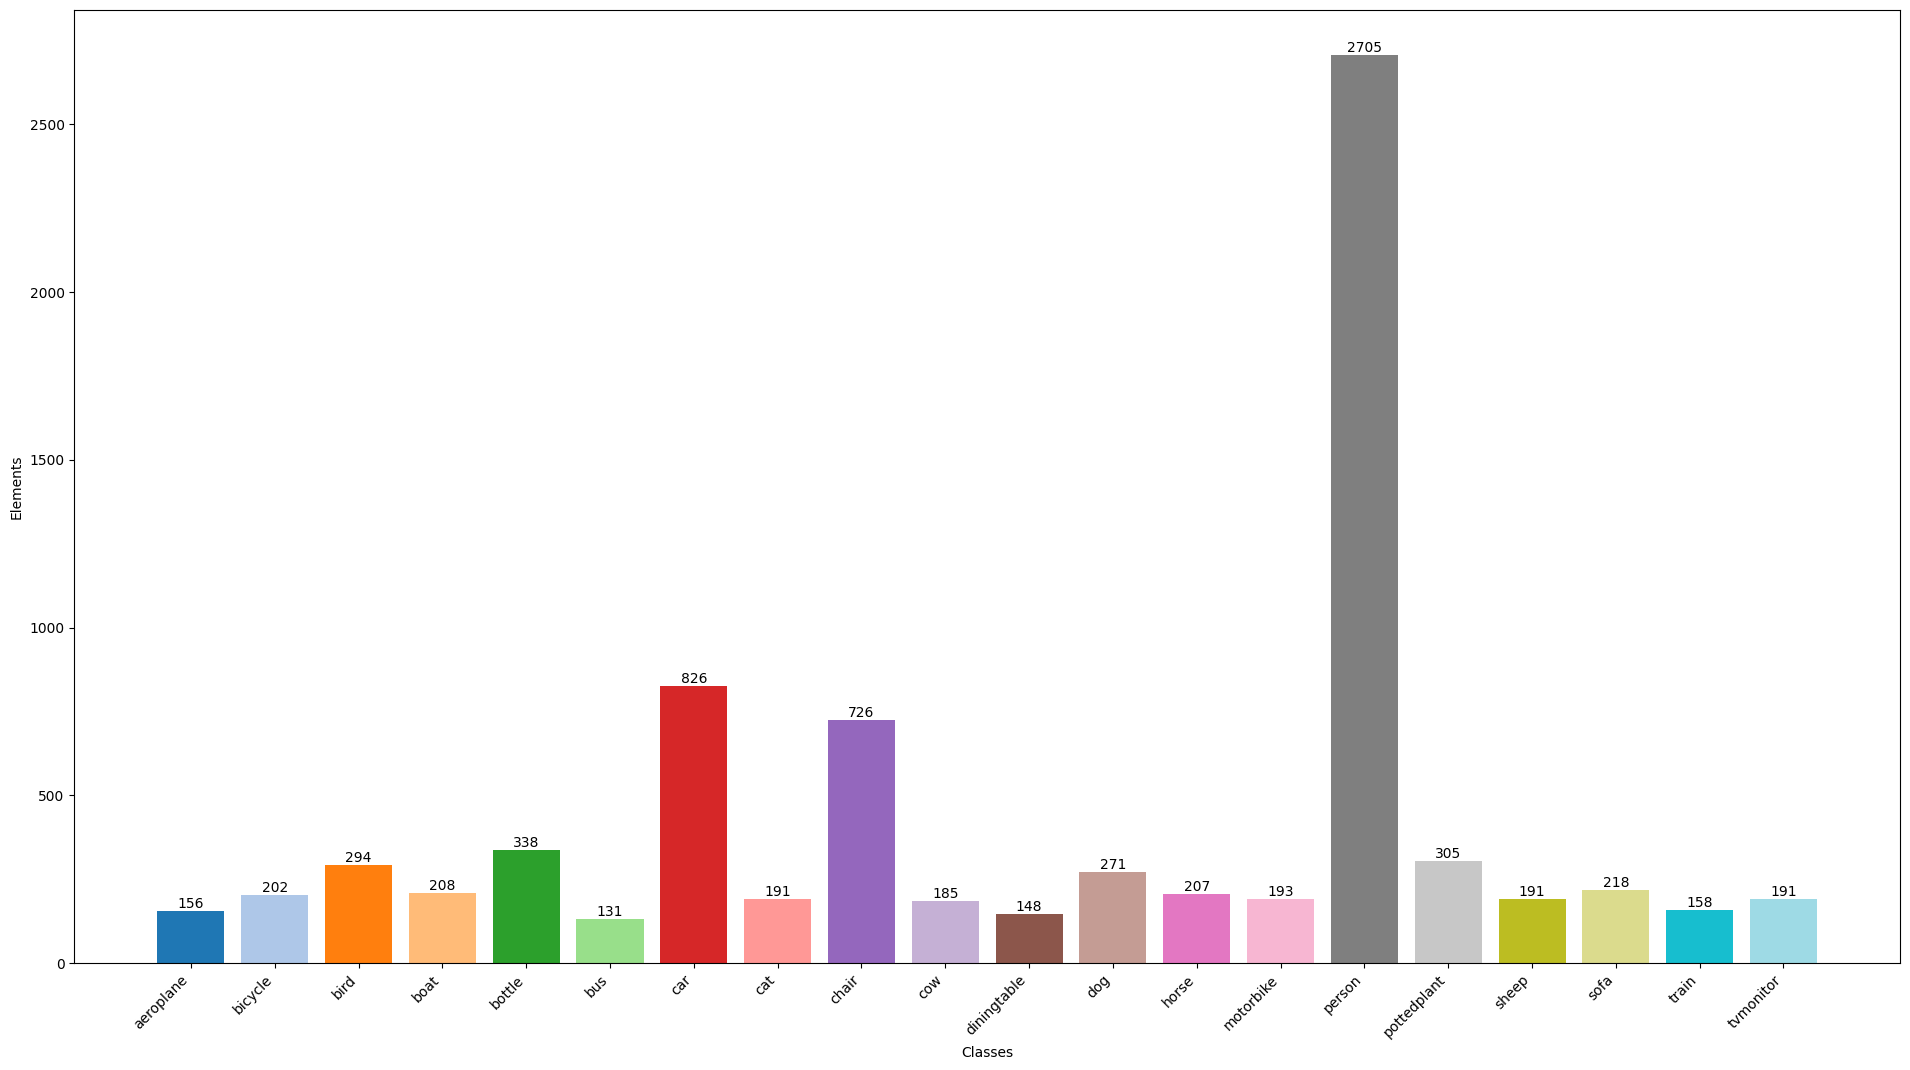

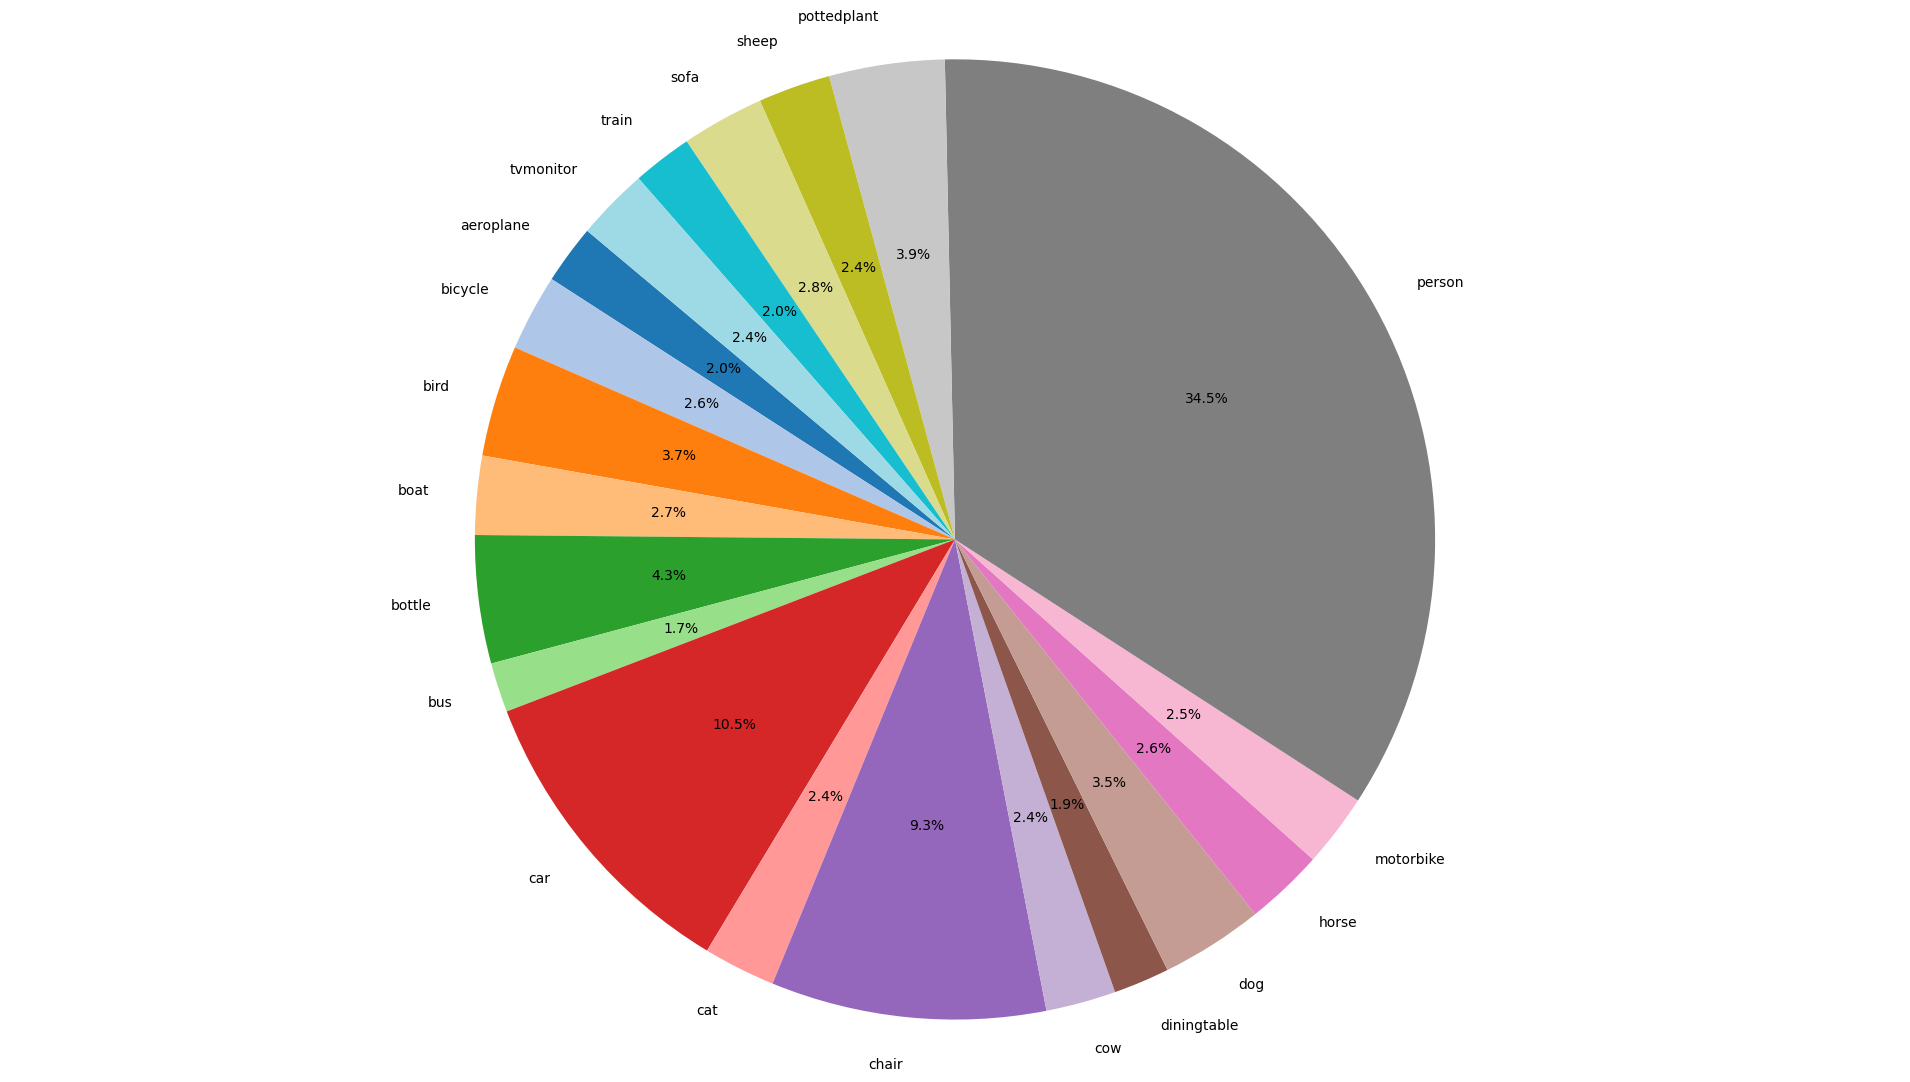

In [6]:
plt.figure(figsize=(19.2, 10.8))
barplot = plt.bar(range(len(categories)), elements_per_class_trainset, color=colors)
plt.bar_label(barplot, elements_per_class_trainset)
plt.xlabel('Classes')
plt.ylabel('Elements')
plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2007_classes_distribution"), pad_inches=0.)
plt.show()

plt.figure(figsize=(19.2, 10.8))
plt.pie(elements_per_class_trainset, labels=categories.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2007_pie_classes_distribution"), pad_inches=0.)
plt.show()

**Boudingboxes Overlay Distribution**

100%|██████████| 14991/14991 [00:00<00:00, 3919023.39it/s]


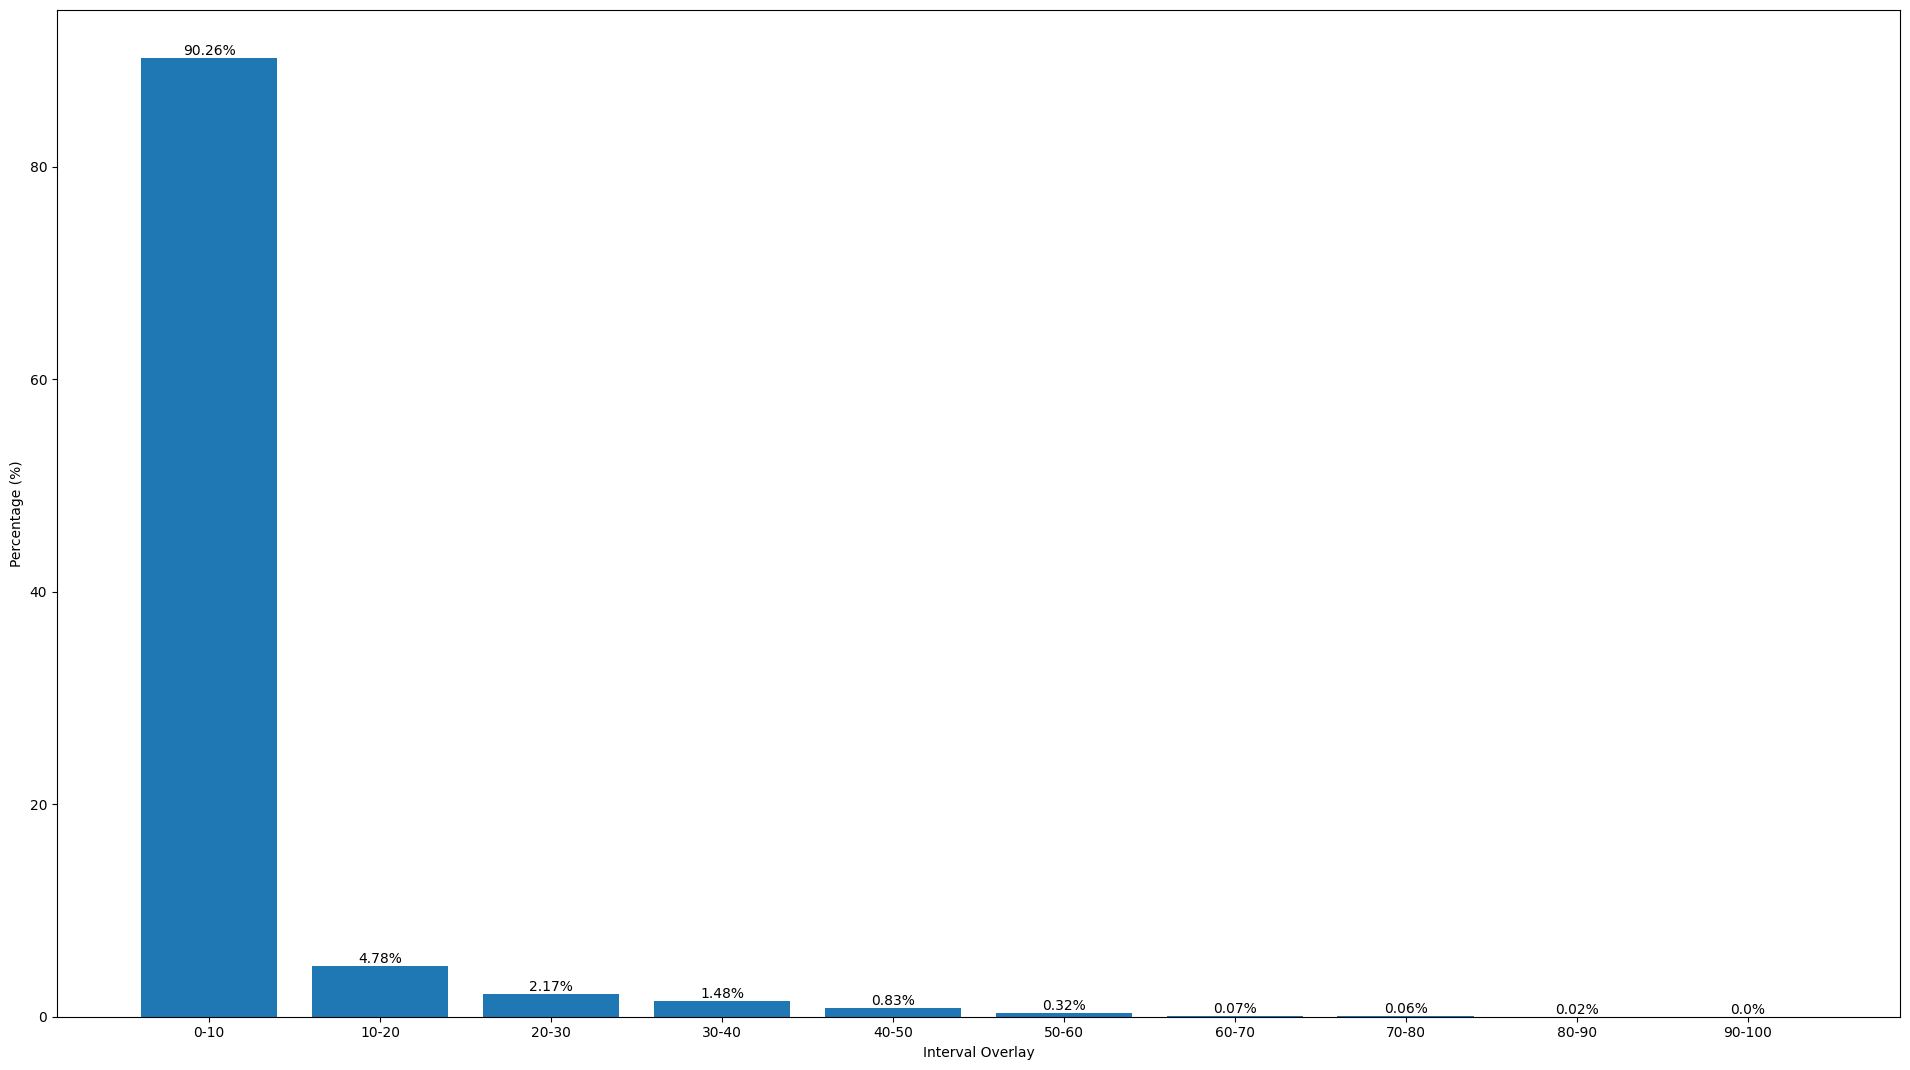

In [7]:
overlay_thresholds = [0] * 10
for iou in tqdm(bboxes_overlay_trainset, total=len(bboxes_overlay_trainset)):
    res = int(iou * 10)
    overlay_thresholds[res] += 1

percentages = [(overlay / len(bboxes_overlay_trainset)) * 100 for overlay in overlay_thresholds]
labels = [f'{i * 10}-{(i+1) * 10}' for i in range(len(overlay_thresholds))]

plt.figure(figsize=(19.2, 10.8))
barplot = plt.bar(range(len(overlay_thresholds)), percentages)
plt.bar_label(barplot, [f"{round(p, 2)}%" for p in percentages])
plt.xticks(range(len(overlay_thresholds)), [f'{i * 10}-{(i+1) * 10}' for i in range(len(overlay_thresholds))])
plt.xlabel("Interval Overlay")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2007_overlay_bboxes_distribution"), pad_inches=0.)
plt.show()

# **PASCALVOC2012**

In [ ]:
from computer_vision.dataset import prepare_vocdetection

train, validation, weights, num_classes, categories, dataset_name, dataset_type = prepare_vocdetection(datasets_path, "2012", box_format="xywh")

100%|██████████| 17125/17125 [00:13<00:00, 1230.43it/s]


In [9]:
cmap = plt.get_cmap('tab20')

colors = [cmap(i / num_classes) for i in range(num_classes)]

In [10]:
from yolo_tools import intersection_over_union

import torch
elements_per_class_trainset = [0] * num_classes
bboxes_overlay_trainset = []

for (_, bboxes), (_, labels) in tqdm(zip(train["bboxes"].items(), train["labels"].items()), total=len(train["bboxes"]), leave=True):
    for label in labels:
        elements_per_class_trainset[label] += 1

    if len(bboxes) > 1:
        for i in range(len(bboxes) - 1):
            for j in range(i+1, len(bboxes) - 1):
                bboxes_overlay_trainset.append(intersection_over_union(torch.tensor(bboxes[i]), torch.tensor(bboxes[j]), box_format="xywh").item())

100%|██████████| 4323/4323 [00:02<00:00, 1785.60it/s]


**Classes Distribution**

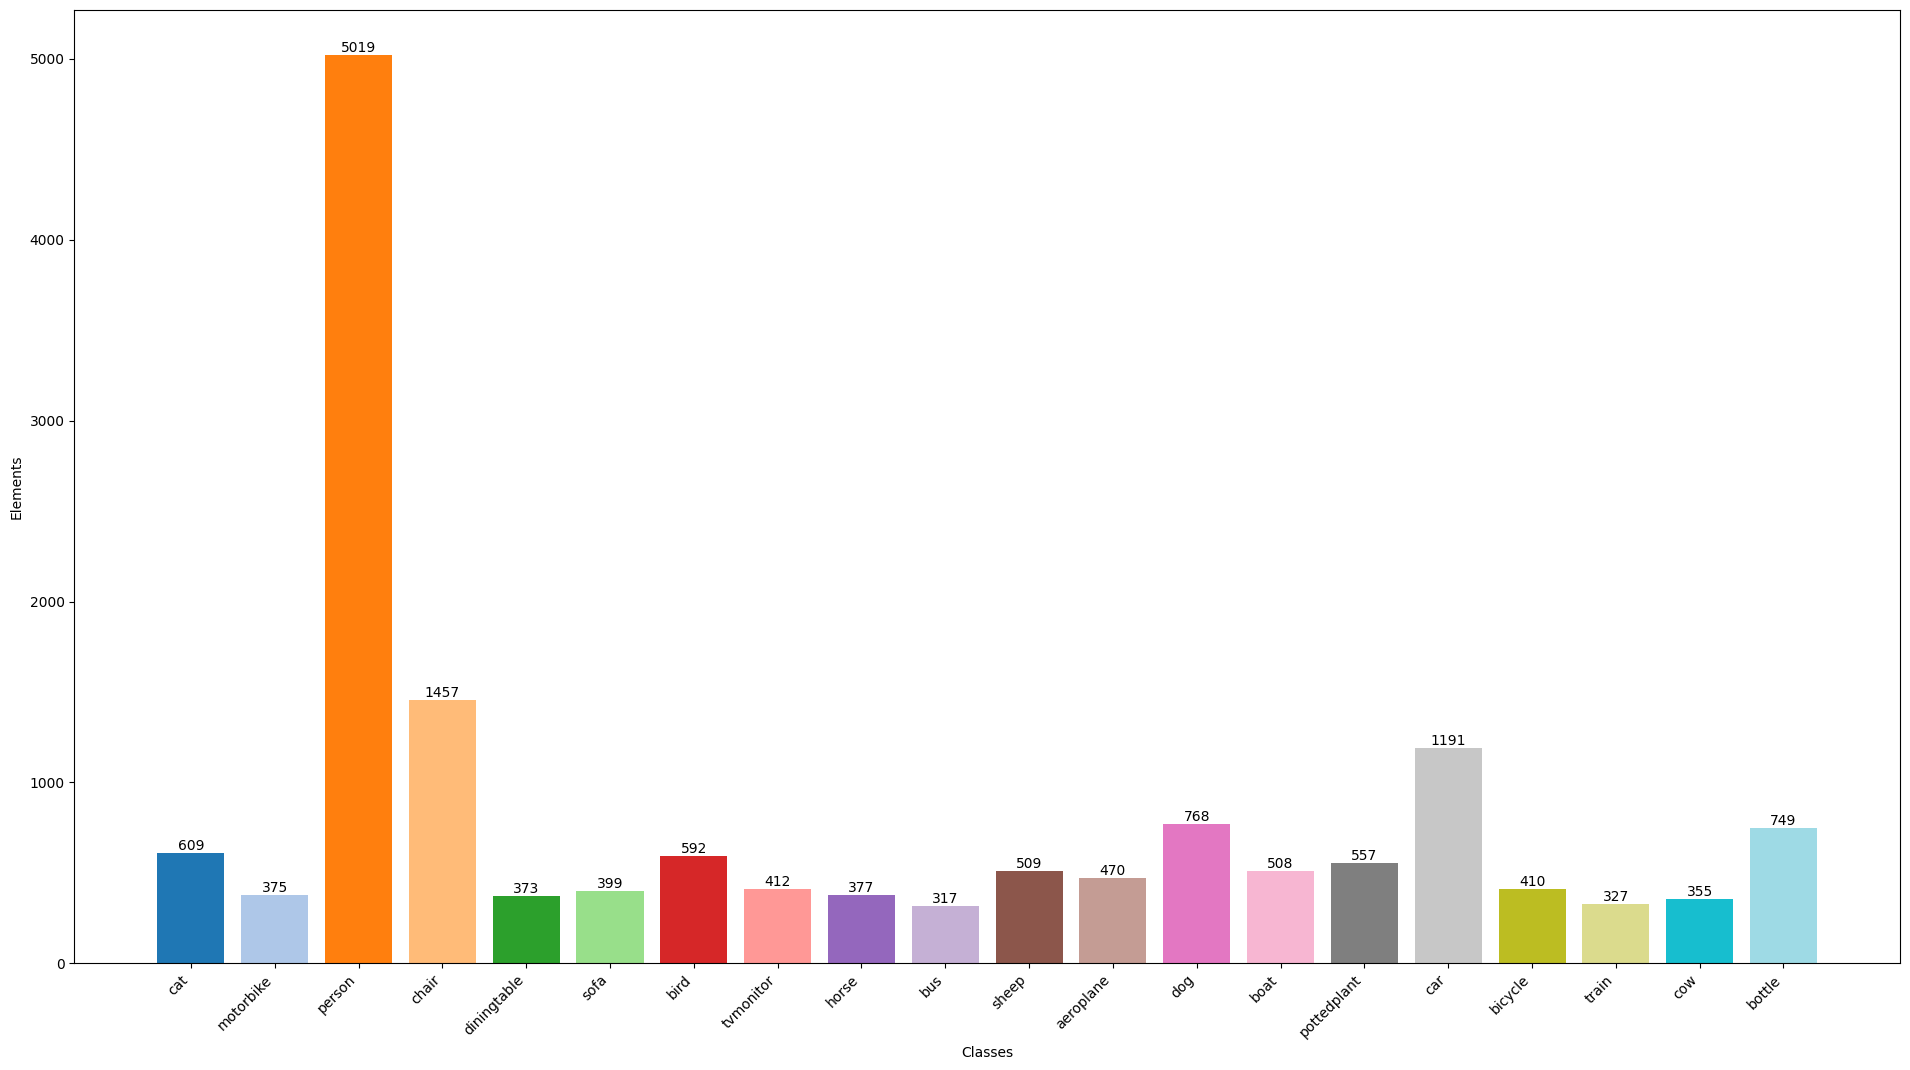

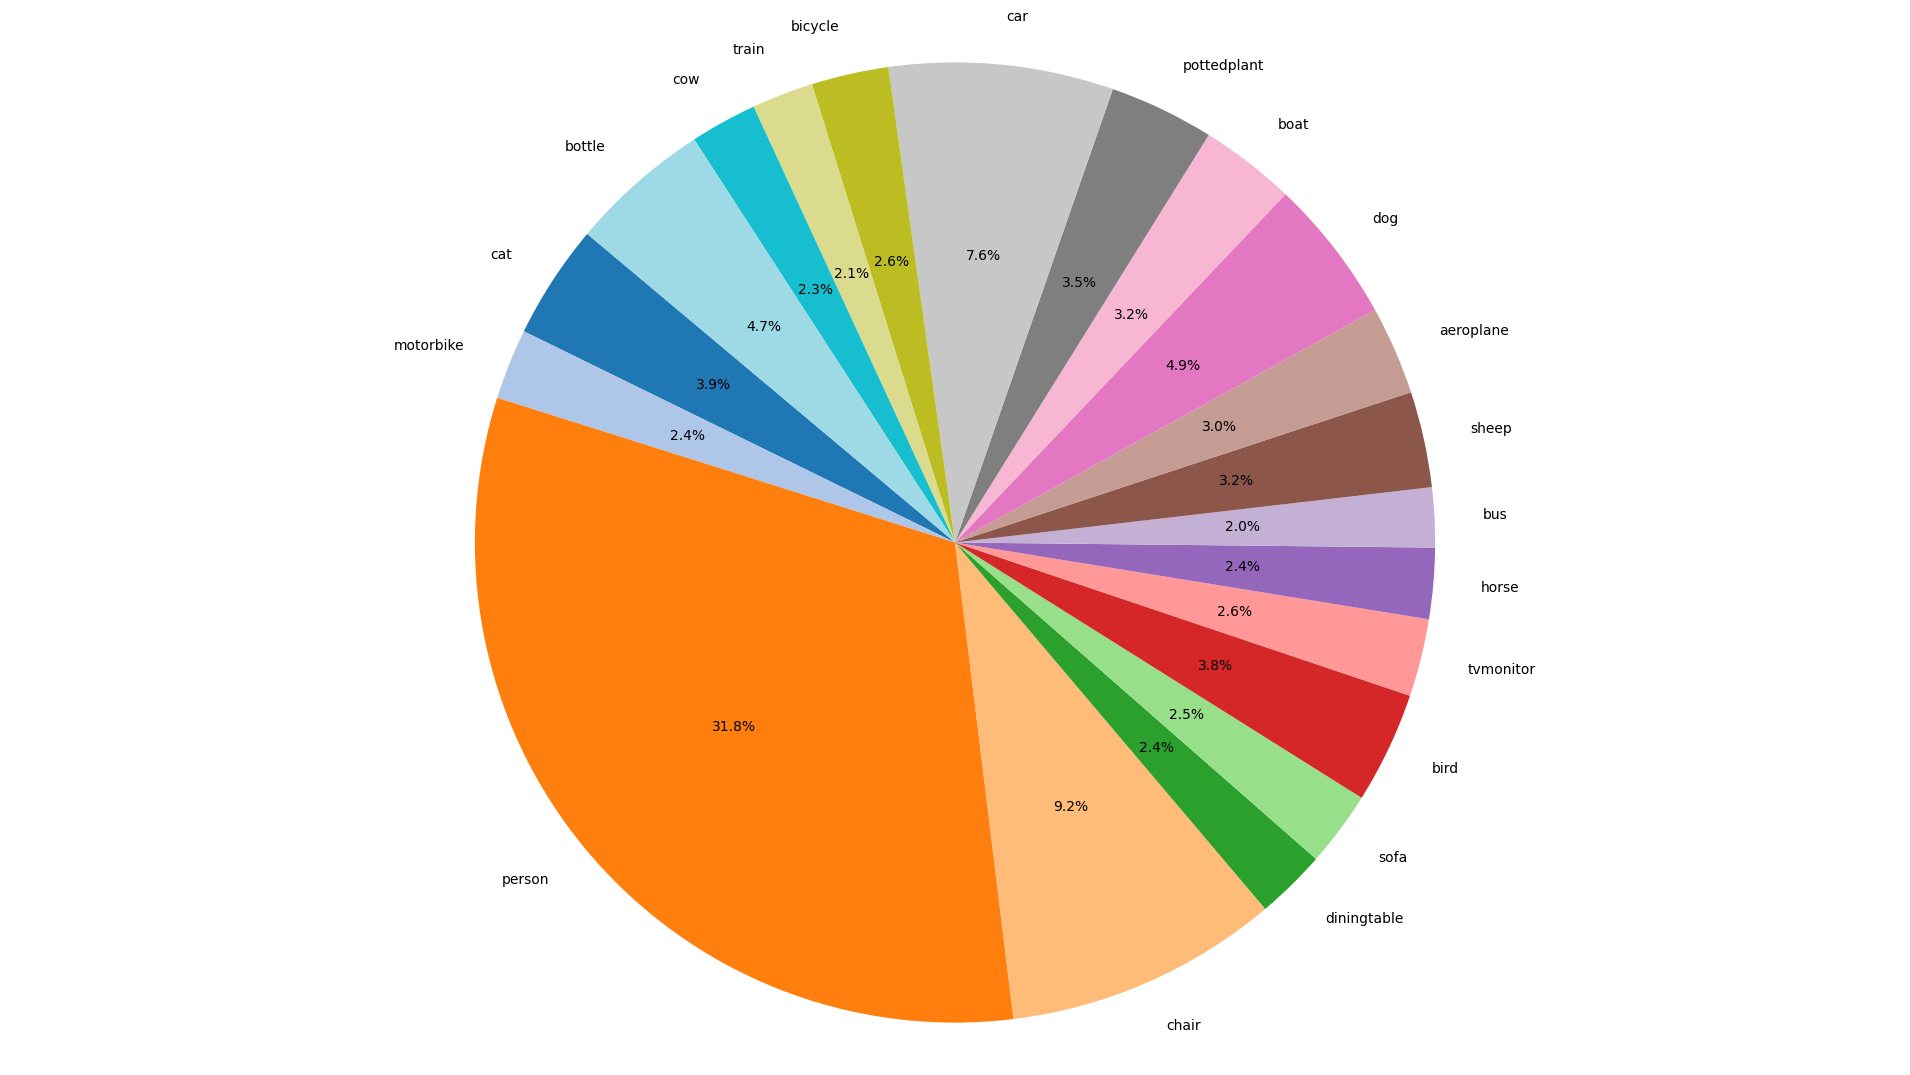

In [11]:
plt.figure(figsize=(19.2, 10.8))
barplot = plt.bar(range(len(categories)), elements_per_class_trainset, color=colors)
plt.bar_label(barplot, elements_per_class_trainset)
plt.xlabel('Classes')
plt.ylabel('Elements')
plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2012_classes_distribution"), pad_inches=0.)
plt.show()

plt.figure(figsize=(19.2, 10.8))
plt.pie(elements_per_class_trainset, labels=categories.keys(), autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2012_pie_classes_distribution"), pad_inches=0.)
plt.show()

**Boudingboxes Overlay Distribution**

100%|██████████| 36818/36818 [00:00<00:00, 3907438.70it/s]


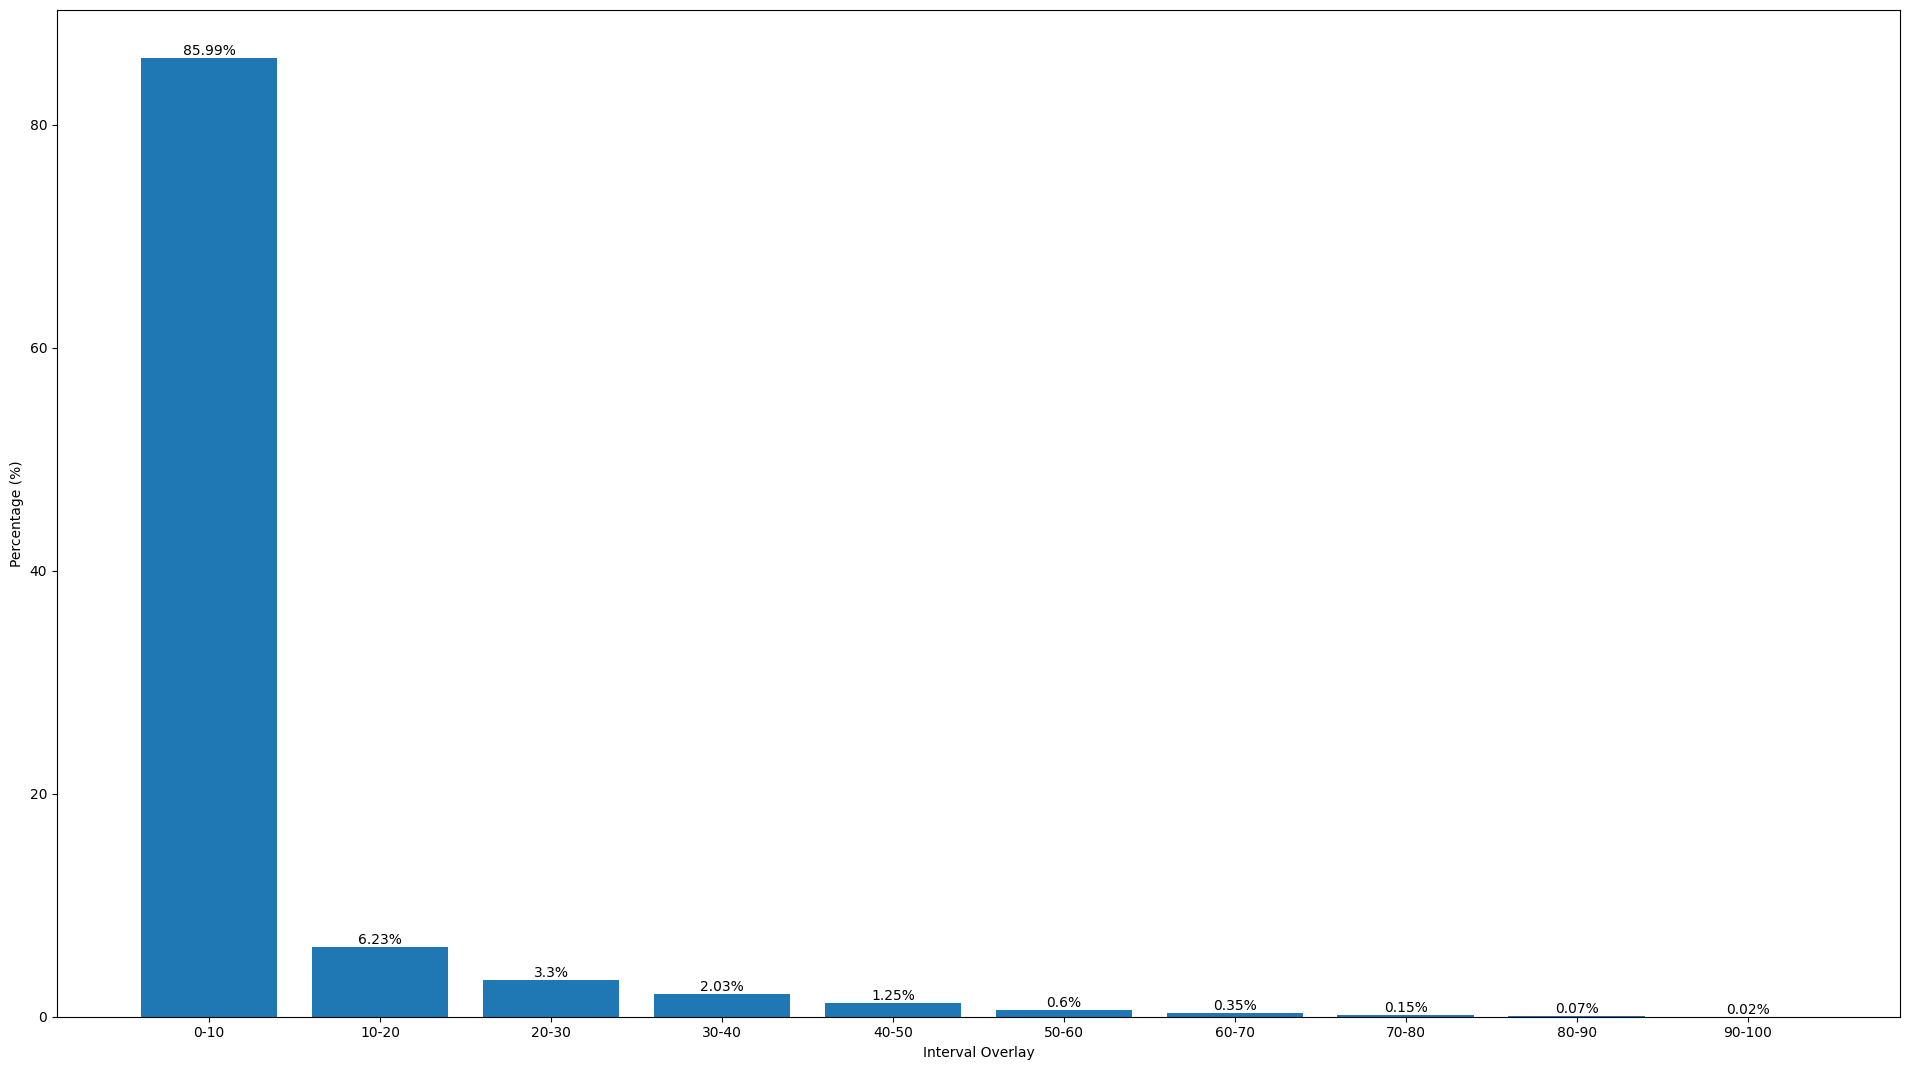

In [12]:
overlay_thresholds = [0] * 10
for iou in tqdm(bboxes_overlay_trainset, total=len(bboxes_overlay_trainset)):
    res = int(iou * 10)
    overlay_thresholds[res] += 1

percentages = [(overlay / len(bboxes_overlay_trainset)) * 100 for overlay in overlay_thresholds]
labels = [f'{i * 10}-{(i+1) * 10}' for i in range(len(overlay_thresholds))]

plt.figure(figsize=(19.2, 10.8))
barplot = plt.bar(range(len(overlay_thresholds)), percentages)
plt.bar_label(barplot, [f"{round(p, 2)}%" for p in percentages])
plt.xticks(range(len(overlay_thresholds)), [f'{i * 10}-{(i+1) * 10}' for i in range(len(overlay_thresholds))])
plt.xlabel("Interval Overlay")
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.savefig(os.path.join(os.path.dirname(""), "plots", f"Pascalvoc2012_overlay_bboxes_distribution"), pad_inches=0.)
plt.show()

# **Face Detection**

In [2]:
from computer_vision.dataset import prepare_face_detection

import torch
train, validation, weights, num_classes, categories, _, _ = prepare_face_detection(datasets_path, size=224)

100%|██████████| 6573/6573 [00:52<00:00, 125.62it/s]


**YOLOV1 abilities on Face Detection Dataset**

In [3]:
S = 7
B = 2
C = num_classes

In [4]:
def _loc(line: torch.Tensor, rate: int = 5) -> int:
    for i in range(C, line.shape[0], rate):
        if line[i] == 0:
            return int(i/rate)
    return int((i/rate)) + 1

In [5]:
num_images = 0
num_bboxes = 0
total_bboxes = 0

In [6]:
from tqdm import tqdm

for (_, bboxes), (_, labels) in tqdm(zip(train["bboxes"].items(), train["labels"].items()), total=len(train["bboxes"]), leave=True):
    done = False
    grid_label = torch.zeros(size=(S, S, C + (5 * B)))

    for bbox, label in zip(bboxes, labels):
        total_bboxes += 1
        x, y, w, h = bbox
        i, j = int(y * S), int(x * S)

        x_cell, y_cell = S * x - j, S * y - i
        height_cell, width_cell = (h * S, w * S)

        pos = torch.nonzero(grid_label[i, j, :C])
        if pos.nelement() != 0:
            if pos[0].item() == label:
                n = _loc(grid_label[i,j])
                if n * 5 + C < B * 5 + C:
                    grid_label[i, j, n * 5] = 1

                    box_coordinates = torch.tensor([x_cell, y_cell, width_cell, height_cell])
                    try:
                        grid_label[i, j, n * 5 + 1:(n+1) * 5] = box_coordinates
                    except:
                        num_bboxes += 1
                        if not done:
                            done = True
                            num_images += 1
                else:
                    num_bboxes += 1
                    if not done:
                        done = True
                        num_images += 1
            else:
                num_bboxes += 1
                if not done:
                    done = True
                    num_images += 1
        else:
            grid_label[i, j, C] = 1

            cell_bbox = torch.tensor([x_cell, y_cell, width_cell, height_cell])
            grid_label[i, j, C+1:C+5] = cell_bbox
            grid_label[i, j, label] = 1

100%|██████████| 26266/26266 [00:05<00:00, 4795.08it/s] 


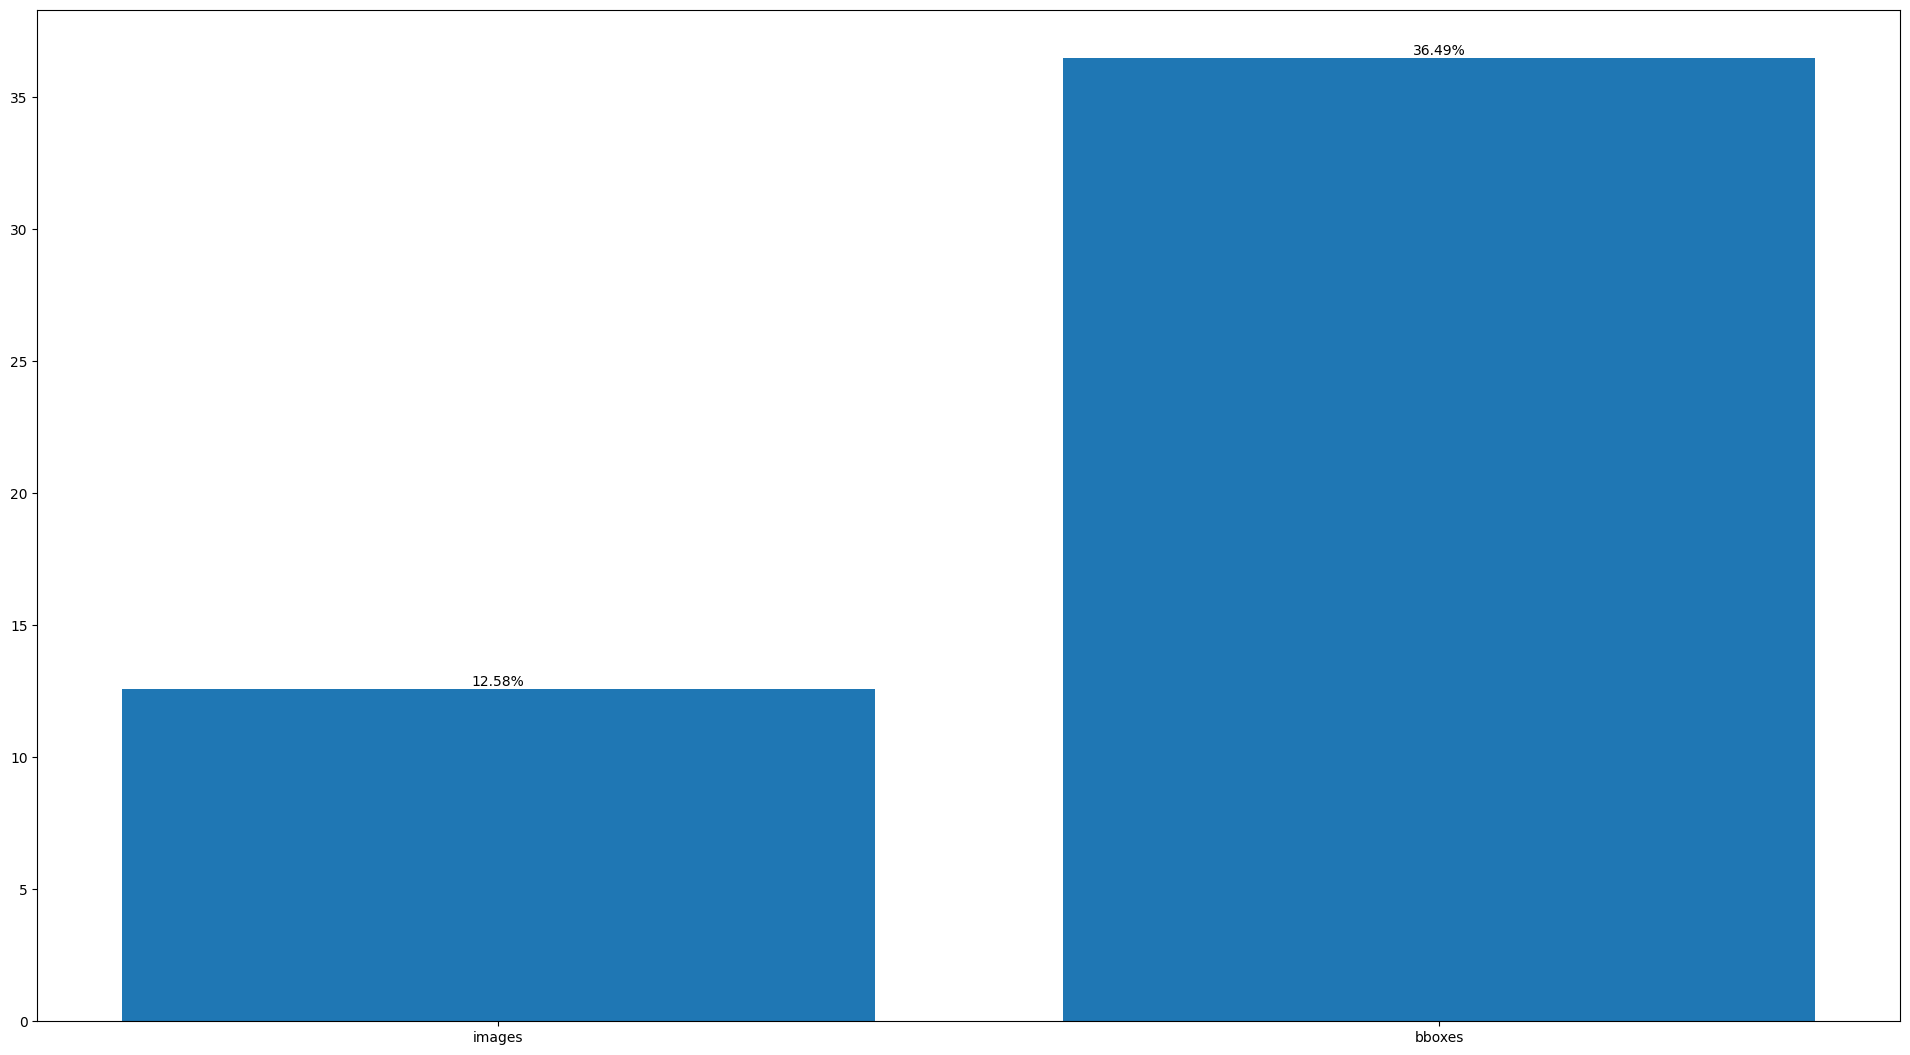

In [13]:
plt.figure(figsize=(19.2, 10.8))

percs = [round(num_images / len(train["images"]), 4) * 100, round(num_bboxes / total_bboxes, 4) * 100]
barplot = plt.bar(range(2), percs)
plt.bar_label(barplot, [f"{p}%" for p in percs])
plt.xticks(range(2), ["images", "bboxes"])
plt.suptitle("")
plt.tight_layout()
plt.show()